In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
plt.style.use('default')

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           86785 non-null  int64  
 1   date                                 86785 non-null  object 
 2   country                              86785 non-null  object 
 3   confirmed                            86785 non-null  float64
 4   deaths                               86785 non-null  float64
 5   recovered                            86785 non-null  float64
 6   active                               86785 non-null  float64
 7   daily_confirmed                      86564 non-null  float64
 8   daily_deaths                         86564 non-null  float64
 9   daily_recovered                      86564 non-null  float64
 10  iso_code                             18451 non-null  object 
 11  total_vaccinations          

In [2]:
gr = covid_df.groupby('date')['people_fully_vaccinated'].sum()
gr

date
2020-01-22            0.0
2020-01-23            0.0
2020-01-24            0.0
2020-01-25            0.0
2020-01-26            0.0
                 ...     
2021-05-25    386812824.0
2021-05-26    369676335.0
2021-05-27    366583232.0
2021-05-28    365562888.0
2021-05-29    376845404.0
Name: people_fully_vaccinated, Length: 494, dtype: float64

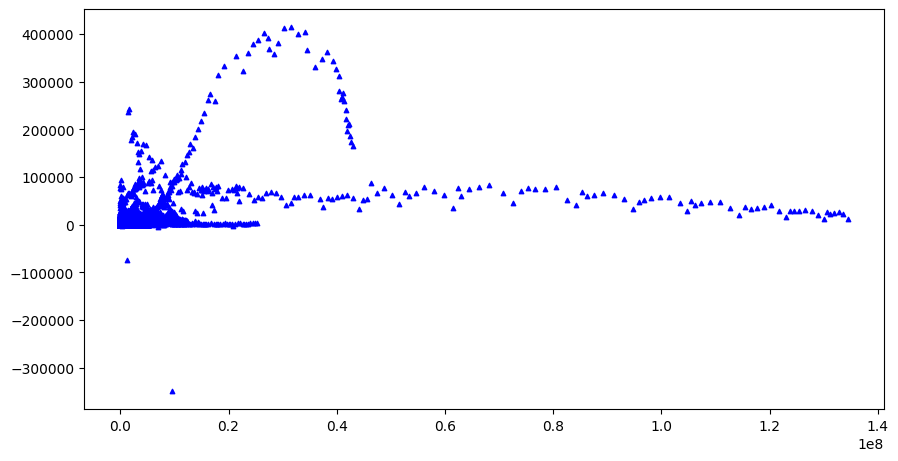

In [3]:
us_data = covid_df
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x = us_data['people_fully_vaccinated'],
    y = us_data['daily_confirmed'],
    s=10,
    marker='^',
    c='blue'
)

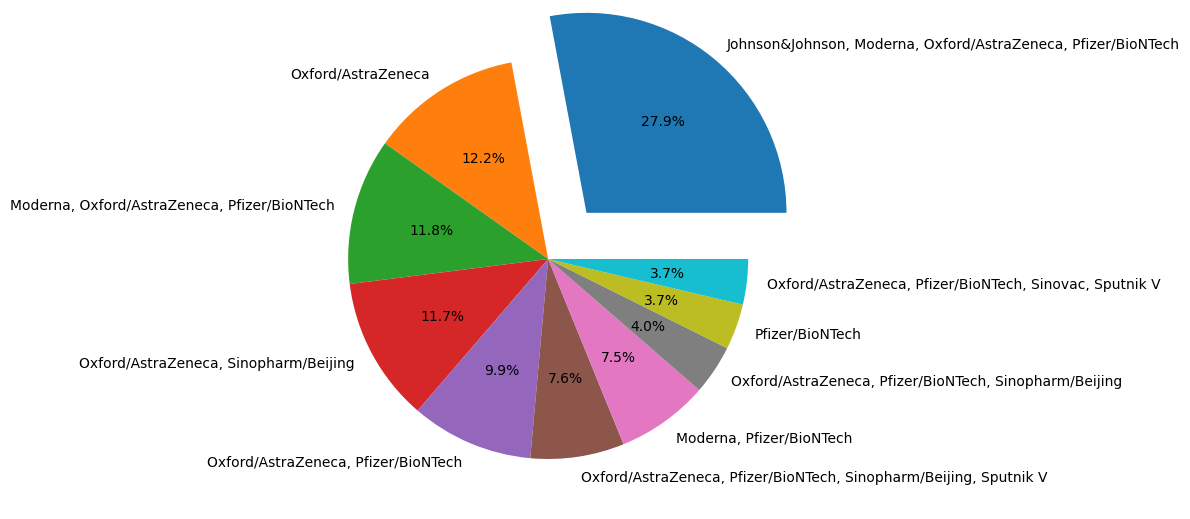

In [4]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%0.1f%%',
    explode= [0.3] + [0]*9
);

In [5]:
combination_not_nan = covid_df.dropna(subset='vaccines')
combination_last = combination_not_nan.groupby('country')['vaccines'].last()
combination_last = combination_last.apply(lambda s: s.replace(' ','').split(','))

vaccines_dict = {}
for vaccines_list in combination_last:
    for vaccine in vaccines_list:
        vaccines_dict[vaccine] = vaccines_dict.setdefault(vaccine, 0) + 1

vaccines_dict

{'Johnson&Johnson': 45,
 'Oxford/AstraZeneca': 149,
 'Pfizer/BioNTech': 102,
 'Sinopharm/Beijing': 66,
 'Sinovac': 39,
 'SputnikV': 48,
 'Moderna': 58,
 'Covaxin': 7,
 'CanSino': 5,
 'Sinopharm/Wuhan': 3,
 'ZF2001': 2,
 'Abdala': 1,
 'Soberana02': 1,
 'COVIranBarekat': 1,
 'QazVac': 1,
 'Sinopharm/HayatVax': 1,
 'EpiVacCorona': 1,
 'Medigen': 1}

In [6]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]


([<matplotlib.patches.Wedge at 0x11dbfea40>,
 [Text(0.6995604980755172, 0.848890516811405, 'Oxford/AstraZeneca'),
  Text(-0.7858288531813955, 0.7697226861068946, 'Pfizer/BioNTech'),
  Text(-1.0737492518932146, -0.23887767593218537, 'Sinopharm/Beijing'),
  Text(-0.6375806240742065, -0.8963765658500592, 'Moderna'),
  Text(0.009761828239201034, -1.09995668401507, 'SputnikV'),
  Text(0.5834629589773508, -0.9325078956777763, 'Johnson&Johnson'),
  Text(0.9574713497642411, -0.5415243432945952, 'Sinovac'),
  Text(1.088929522474283, -0.1556678999791865, 'other')],
 [Text(0.3815784534957366, 0.4630311909880391, '28.1%'),
  Text(-0.4286339199171248, 0.41984873787648797, '19.2%'),
  Text(-0.5856814101235716, -0.13029691414482839, '12.4%'),
  Text(-0.34777124949502164, -0.48893267228185044, '10.9%'),
  Text(0.005324633585018745, -0.599976373099129, '9.0%'),
  Text(0.31825252307855495, -0.5086406703696961, '8.5%'),
  Text(0.5222570998714041, -0.29537691452432463, '7.3%'),
  Text(0.5939615577132452, 

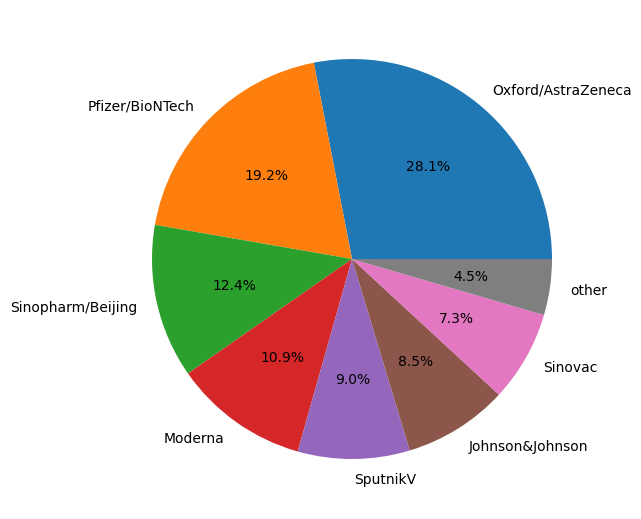

In [7]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%0.1f%%'
)

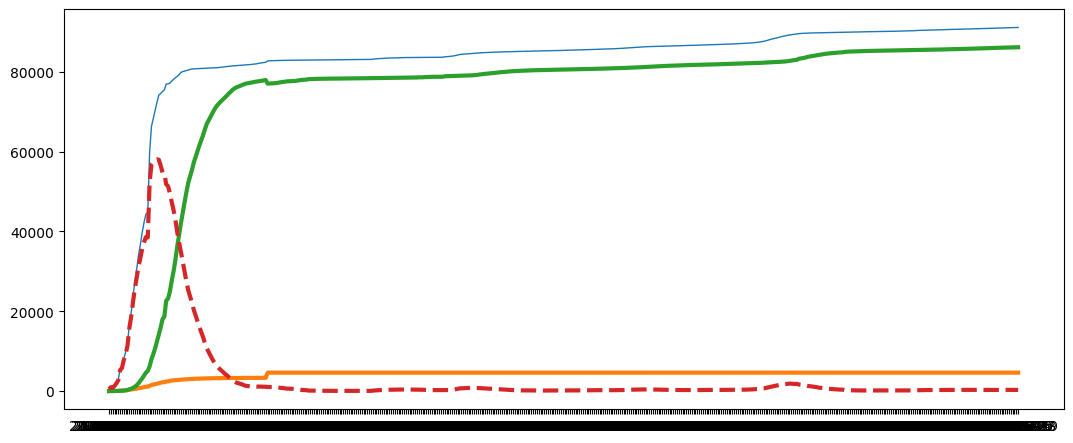

In [8]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=1)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

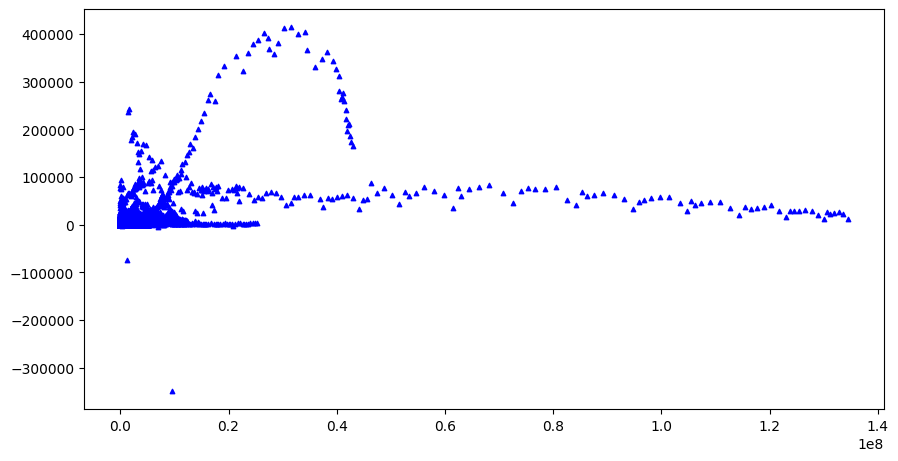

In [9]:
us_data = covid_df
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x = us_data['people_fully_vaccinated'],
    y = us_data['daily_confirmed'],
    s=10,
    marker='^',
    c='blue'
)

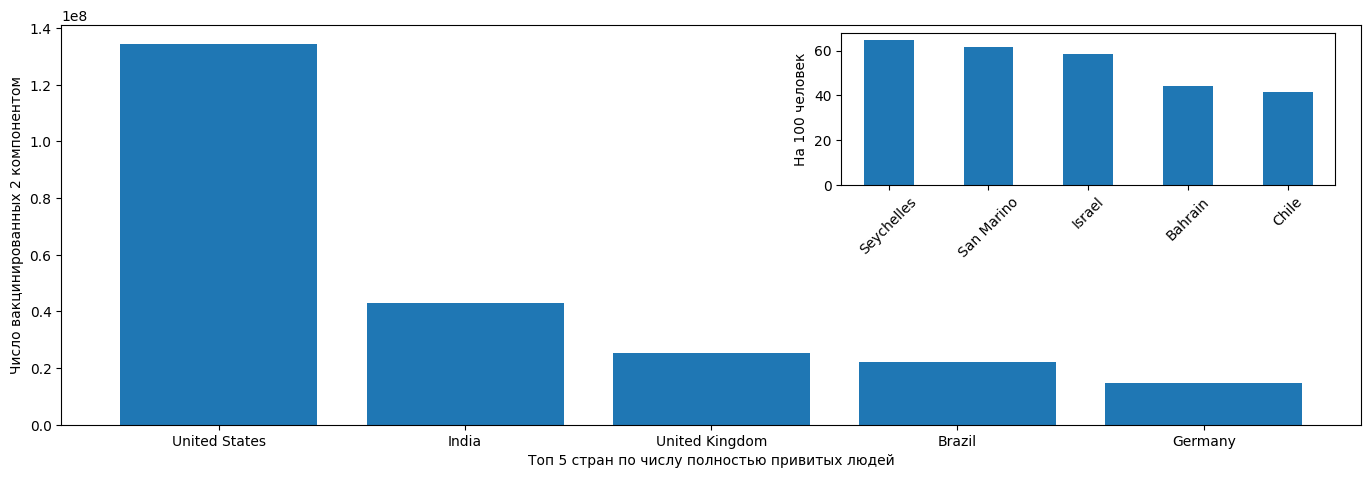

In [10]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])

main_axes.bar(
    x = vacc_country.index,
    height = vacc_country
)
main_axes.set_ylabel('Число вакцинированных 2 компонентом')
main_axes.set_xlabel('Топ 5 стран по числу полностью привитых людей')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(
    x = vacc_country_per_hundred.index,
    height = vacc_country_per_hundred,
    width = 0.5
)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

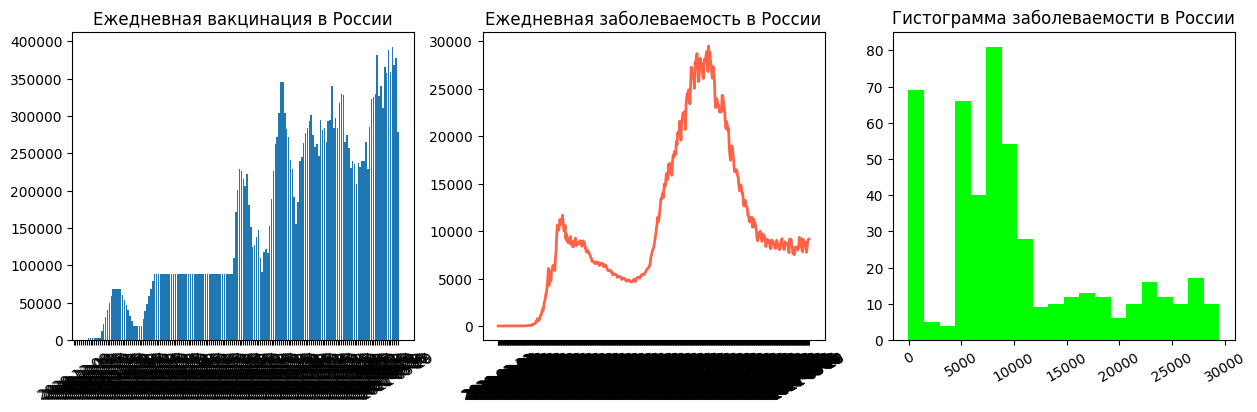

In [13]:
russia_data = covid_df[covid_df['country'] == 'Russia']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=30)

axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=30)

axes[2].hist(
    x=russia_data['daily_confirmed'],
    label='Число заболевших',
    color='lime',
    bins=20
)
axes[2].set_title('Гистограмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)
